# Klasse B versterkers

In [1]:
from cursusdef import *

## Inleiding

In {numref}`vermogenversterkersB` hernemen we een overzicht van de verschillende versterkers die we bespreken in de leerlijn analoge elektronica. 
In het vorige hoofdstuk bespraken we de laagfrequent versterkers die slechts 1 vermogentransistor gebruiken in de laatste trap (daar waar het meeste vermogen verbruikt wordt).
In dit hoofdstuk bespreken we de laagfrequent versterkers die 2 of meer vermogentransistor gebruiken in de laatste trap. 
Dit geeft een duurder ontwerp van de versterker, maar zoals we later zullen zien, geeft dit een veel efficientere implementaties.
Als een gevolg hiervan kan de duurdere aanschafkost gemakkelijk terugewonnen worden door het lager energieverbruik.

:::{list-table} Indeling van de vermogenversterkers
:header-rows: 1
:name: vermogenversterkersB

* - 
  - laagfrequent of breedband
  - hoogfrequent of resonant
* - 1 transistor in de vermogentrap
  - Klasse A
  - Klasse C <BR> Klasse F <BR>Klasse E
* - 2 of meer  transistors in de vermogentrap
  - **Klasse B**  <BR> Klasse G
  - Klasse D
:::

## Basisschema

### Schema voor DC werking

{numref}`Bfig1` toont het basisschema van de Klasse B versterker. We herkennen een bipolaire npn en pnp transistor. 
Beide transistors staan in gemeenschappelijke collector configuratie.
Op deze manier werkt de vermogentransistor als stroomversterker. 
De spanning aan de basis wordt (op de redelijk constante basis-emitter offset na) doorgegeven naar de collector.
De stroom aan de collector wordt echter met de factor $\beta_F$ van de bipolaire transistor versterkt. 

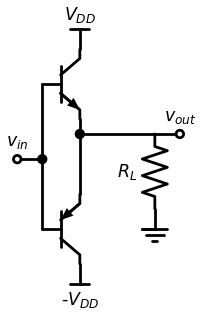

In [6]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='down', l=1.5)
    indot=Dot()
    Line(d='down', l=1.4)
    T2 = BjtPnp(  d='right')
    
    Vdd(xy=T1.collector,  l=0.75,  label='$V_{DD}$')
    Line(xy=indot.start, d='left', l=0.5)
    Dot(open=True, label='$v_{in}$')
    Line(d='down',xy=T1.emitter, l=0.3)
    outdot=Dot()
    Line(d='down',xy=outdot.start,toy=T2.emitter)
    Vss(xy=T2.collector,label='-$V_{DD}$')
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down',l=1.5, label='$R_L$')
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')

Het is belangrijk in dit schema de verschillende bouwblokken te herkennen. {numref}`Bfig1anot` toont deze bouwblokken. We hebben natuurlijk in de eerste plaats de belasting $R_L$. Deze wordt hier symbolish weergegeven als een weerstand, maar kan in de praktijk eender welke actuator zijn die vermogen opneemt in fase met de belasting.

Daarnaast zien we (in de groene box) zowel het pull-up netwerk als het pull-down netwerk aangeduid.

In het schema van {numref}`Bfig1` zien we dat er zowel een AC-pad als een DC-pad tussen beide voedingen ($V_{DD}$ en -$V_{DD}$) en de belasting mogelijk is.

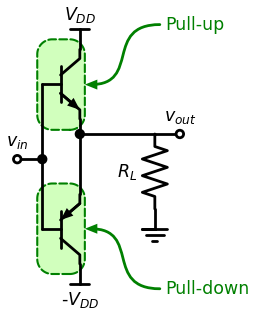

In [88]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='down', l=1.5)
    indot=Dot()
    Line(d='down', l=1.4)
    T2 = BjtPnp(  d='right')
    
    Vdd(xy=T1.collector,  l=0.75,  label='$V_{DD}$')
    Line(xy=indot.start, d='left', l=0.5)
    Dot(open=True, label='$v_{in}$')
    Line(d='down',xy=T1.emitter, l=0.3)
    outdot=Dot()
    Line(d='down',xy=outdot.start,toy=T2.emitter)
    Vss(xy=T2.collector,label='-$V_{DD}$')
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down',l=1.5, label='$R_L$')
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')

    pullup = EncircleBox([T1],padx=.1).linestyle('--').linewidth(1.5).color('green').fill('xkcd:very light green')
    pulldown = EncircleBox([T2],padx=.1).linestyle('--').linewidth(1.5).color('green').fill('xkcd:very light green')
    Annotate(th1=0).at(pullup.E).delta(dx=1.5, dy=1.2).label('Pull-up').color('green')
    Annotate(th1=0).at(pulldown.E).delta(dx=1.5, dy=-1.2).label('Pull-down').color('green')

Om dit schema te kunnen simuleren in SPICE, geven we nummers aan de verschillende knopen, zoals je kan zien in {numref}`Bfig1num`. Deze nummers kan je dan vervolgens terugvinden in de spice-listing.

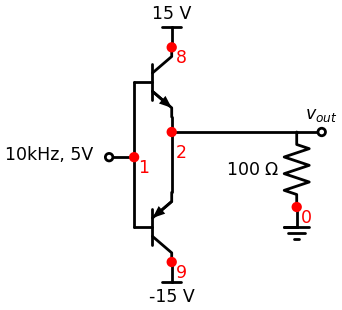

In [115]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='down', l=1.5)
    indot=Dot(color='red').label('1', loc='center', ofst=[.2,-.2])
    Line(d='down', l=1.4)
    T2 = BjtPnp(  d='right')
    
    Vdd(xy=T1.collector,  l=0.75,  label='15 V')
    Dot(color='red').label('8', loc='center', ofst=[.2,-.2])
    Line(xy=indot.start, d='left', l=0.5)
    Dot(open=True).label('10kHz, 5V',ofst=[-1.2,-.2])
    Line(d='down',xy=T1.emitter, l=0.3)
    outdot=Dot(color='red').label('2', loc='center', ofst=[.2,-.4])
    Line(d='down',xy=outdot.start,toy=T2.emitter)
    Vss(xy=T2.collector,label='-15 V')
    Dot(color='red').label('9', loc='center', ofst=[.2,-.2])
    Line(xy=outdot.start,  d='right', l=2.5)
    R = Resistor(d='down',l=1.5, label='100 $\Omega$')
    Ground()
    Dot(color='red').label('0', loc='center', ofst=[.2,-.2])
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')

In [2]:
spicelisting("simul/classB1.sp")

Klasse B versterker
*
* SUPPLY VOLTAGES
VPOS 8 0 DC	+15V
VNEG 9 0 DC	-15V
*
*  input source
VS1 1 0	DC 0 SIN(0V 5VPEAK 10KHZ)
*
*  PUSH-PULL TRANSISTOR OUTPUT STAGE
Q1 8 1 2 QNPN
Q2 9 1 2 QPNP
*
* Load resistance
RL1 2 0	100
*
* DEVICE MODELS
.model QNPN	NPN(BF=50)
.model QPNP	PNP(BF=50)

De simulatie (zie {numref}`Bfig2`) van de spice code  geeft duidelijk de dode zone aan bij de nuldoorgang van de spanning. In {numref}`Bfig2B` bekijken we deze nuldoorgang in meer detail.

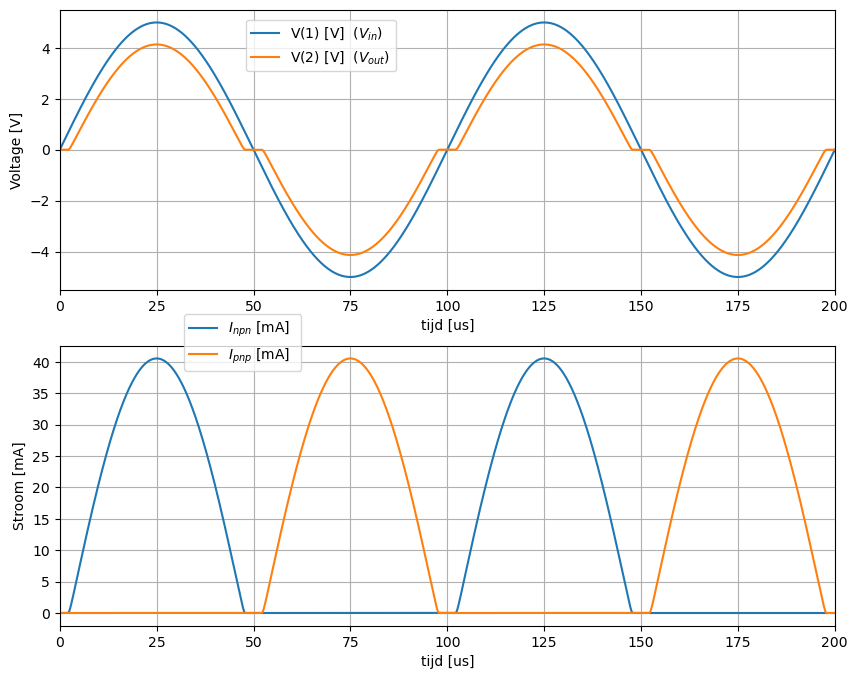

In [31]:
circuit=SpiceParser(path='simul/classB1.sp').build_circuit()     # CHECK DISTORTION WITH FOURIER SERIES ANALYSIS    ==> .FOUR 10KHZ V(12) 
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{out}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]');

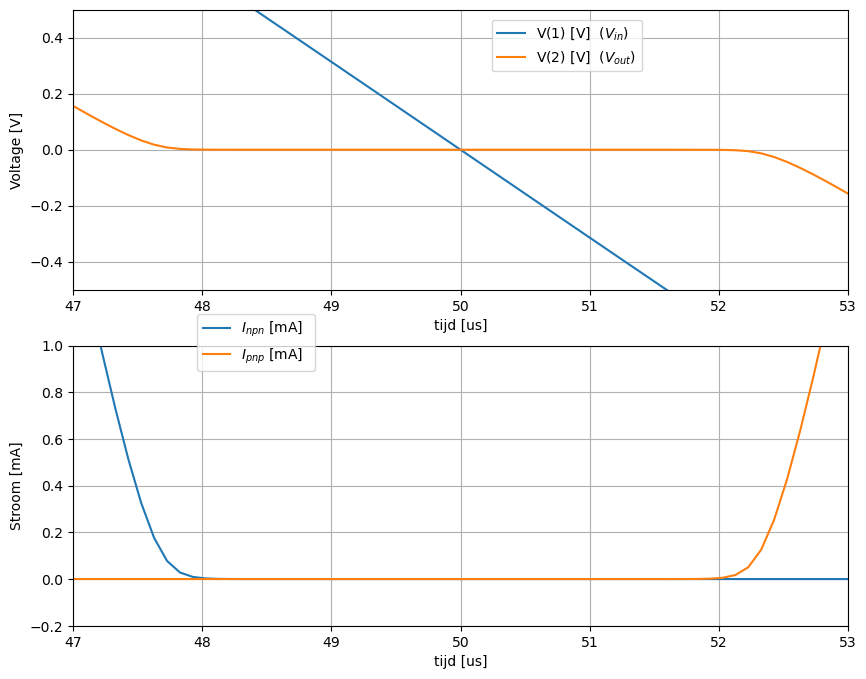

In [30]:
figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{out}$)')
ax[0].legend( loc=(0.54,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(47,53)
ax[0].set_ylim(-0.5,0.5)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(47,53)
ax[1].set_ylim(-0.2,1)
ax[1].set_ylabel('Stroom [mA]');

{numref}`Bfig2C` toont de stroom door als functie van de spanning over de transistor voor de npn transistor. Voor de pnp transistor bekomen we dezelfde grafiek.

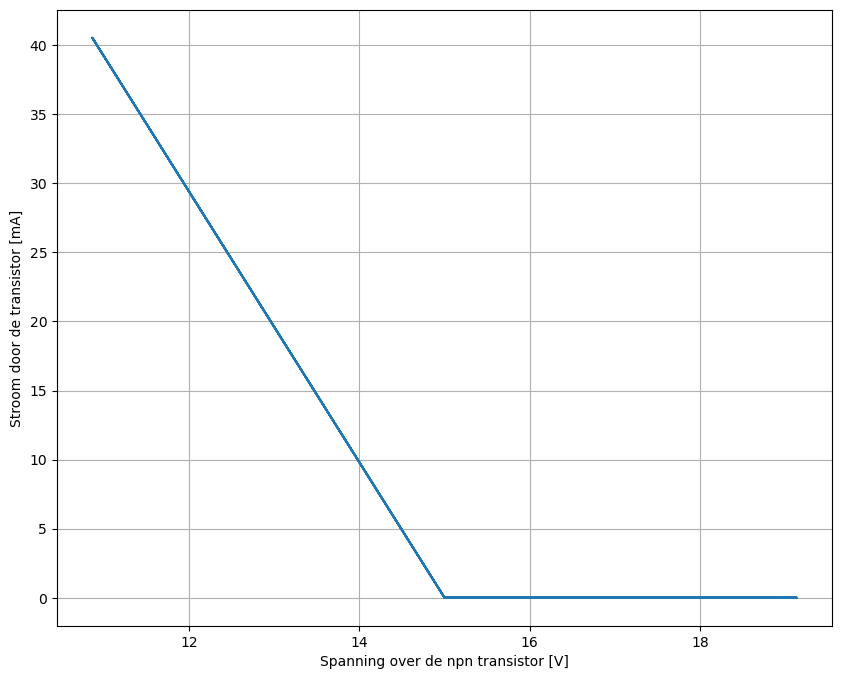

In [32]:
figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis.nodes['8']-analysis.nodes['2'],-analysis.branches['vpos']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de npn transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]');

### Schema voor enkel AC werking

In heel wat implementaties is een DC pad naar de belasting niet gewenst. Hierbij denken we bijvoorbeeld aan een luidspreker. Een DC stroom bij een luidspreker geeft een vaste offset van de conus die de lucht aanstuurt. Dit geeft heel wat verliezen en geeft ook een asymmetrische weergave van het geluid. Dit geeft belangrijke vervormingen en ook ook ongewenste hoger tonen. 
In {numref}`Bfig1AC` zien we de condensator $C_{out}$ aan de uitgang. Deze zorgt ervoor dat er geen DC stroom naar de uitgang loopt. Deze condensator wordt na het opstarten opgeladen tot de gemiddelde spanning van de emitters van beide powertransistors. Normaal is deze spanning de helft van $V_{DD}$ maar indien er een andere gemiddelde spanning op deze knoop zit zal deze condensator deze offset opvangen.

Om de AC uitgangsignalen zo goed mogelijk door te laten, is het aangewezen $C_{out}$ zo groot mogelijk te nemen.
Van de andere kant moet er natuurlijk ook me rekening gehouden worden dat hoe groter $C_{out}$ is, hoe langere het duurt eer de evenwichtswaarde op de condensator bekomen wordt. Bovendien wordt $C_{out}$ duurder als hij groter wordt gekozen.

Om de AC ingangsignalen zo goed mogelijk door te laten, is het aangewezen $C_{in}$ zo groot mogelijk te nemen. Ook hier gelden de aspekten van opstarttijd en kostprijs.

Een ander substantieel voordeel van het schema voor AC sturing is dat er maar 1 voeding nodig is. Dit is in vele gevallen een belangrijke besparing op de kost van het circuit.

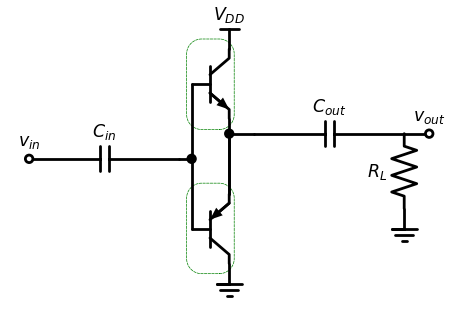

In [5]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='down', l=1.5)
    indot=Dot()
    Line(d='down', l=1.4)
    T2 = BjtPnp(  d='right')
    
    Vdd(xy=T1.collector,  l=0.75,  label='$V_{DD}$')
    Line(xy=indot.start, d='left', l=0.25)
    Capacitor(d='left', label='$C_{in}$')
    Dot(open=True, label='$v_{in}$')
    Line(d='down',xy=T1.emitter, l=0.3)
    outdot=Dot()
    Line(d='down',xy=outdot.start,toy=T2.emitter)
    Ground(xy=T2.collector)
    
    Line(xy=outdot.start,  d='right', l=0.5)
    C1 = Capacitor(d='right', label='$C_{out}$')
    R = Resistor(d='down',l=1.5, label='$R_L$')
    Ground()
    Line(d='down',xy=outdot.start,toy=T2.emitter)
    
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')

    pullup = EncircleBox([T1],padx=.1).linestyle('--').linewidth(0.5).color('green')
    pulldown = EncircleBox([T2],padx=.1).linestyle('--').linewidth(0.5).color('green')

## Gebruik van de voorinstelspanning

Aangezien de dode zone zoals aangegeven in {numref}`Bfig2` en {numref}`Bfig2B` duidelijk problematisch is voor de werking van het schema in de buurt van de nuldoorgang, is het aanbrengen van een voorinstelspanning tussen beide basissen van de vermogentransistors eerste dat moet gebeuren om een nuttig klasse B versterkerschema te bekomen. We kunnen op 3 manieren een voorinstelspanning bekomen:

* Aan de hand van een weerstand tussen de NPN en de PNP transistor
* Aan de hand van een aantal diodes tussen de pull-up transistors en de pull-down transistors
* Aan de hand van een circuit met een NPN transistor tussen de pull-up transistors en de pull-down transistors

Naast het circuit dat voor de voorinstelspanning zorgt tussen beide bassissen moeten we natuurlijk ook ervoor zorgen dat de nodige stroom kan vloeien vanuit $V_{DD}$ naar de basis van de NPN transistor en vanuit de basis van de PNP transistor naar ofwel -$V_{DD}$ of de grond. Hiervoor kiezen we in eerste instantie de twee weerstanden $R_1$ en $R_2$. In een later stadium zullen we hiervoor ook betere alternatieven voorstellen.

Hiermee rekening houdende worden deze 3 mogelijkheden hieronder uitgewerkt.

### Weerstand als voorinstelspanning

De keuze van een weerstand als voorinstelspanning is in eerste instantie de meest eenvoudige om te implementeren (zie {numref}`Bfig1VoorR`). Deze implementatie heeft echter verschillende nadelen.

* We willen met de voorinstelspanning de spanning van de basis-emitter diode nauwkeurig volgen. Deze diodespanning gaat dalen bij toenemende temperatuur, waardoor de stroom verder gaat stijgen als de spanning dezelfde blijft. De stijging van de stroom gaat dan de interne temperatuur nog verder laten toenemen waardoor dit onstabiele effect zichzelf versterkt.
* Als er variaties op de voedingsspanning zijn, gaan deze variaties een invloed hebben op de voorinstelspanning.

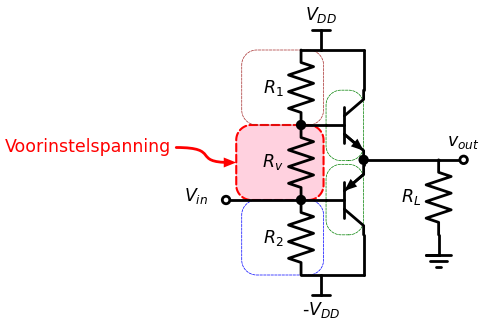

In [32]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=0.5)
    PullUpIn=Dot()
    Rv=Resistor(d='down', label='$R_v$', l=1.5)
    indot=Dot()
    Line(d='right', l=0.5)
    T2 = BjtPnp( d='right')
    r1 = Resistor(xy=PullUpIn.start, d='up', label='$R_1$',l=1.5)
    Line(d='right', l=0.4)
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    r2=Resistor(xy=indot.start, d='down', label='$R_2$',l=1.5)
    Line(d='right', l=0.4)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    
    Line(xy=indot.start, d='left', l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])
    outdot=Dot(xy=T1.emitter)
    Line(d='down',toy=T2.emitter)
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    
    EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    Voorinstelspanning = EncircleBox([Rv],padx=0.2,pady=0).linestyle('--').linewidth(1.5).color('red').fill('xkcd:light pink') 
    EncircleBox([r1],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([r2],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('blue')
    
    Annotate(th1=0).at(Voorinstelspanning.W).delta(dx=-1.2, dy=0.3).label('Voorinstelspanning').color('red')

### Diodes als voorinstelspanning

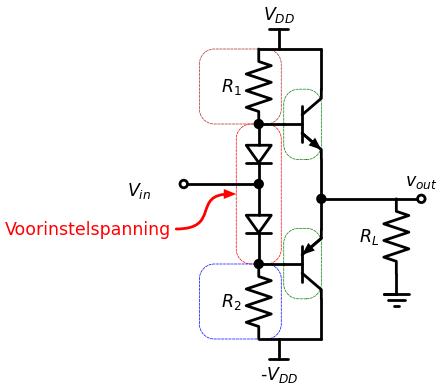

In [57]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=0.5)
    PullUpIn=Dot()
    dv1=Diode(d='down', l=1.2)
    indot=Dot()
    dv2=Diode(d='down', l=1.6)
    PullDownIn=Dot()
    Line(d='right', l=0.5)
    T2 = BjtPnp( d='right')
    r1 = Resistor(xy=PullUpIn.start, d='up', label='$R_1$',l=1.5)
    Line(d='right', l=0.4)
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    r2=Resistor(xy=PullDownIn.start, d='down', label='$R_2$',l=1.5)
    Line(d='right', l=0.4)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    
    Line(xy=indot.start, d='left', l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.9,-.4])
    Line(d='down',xy=T1.emitter, l=0.8)
    outdot=Dot()
    Line(d='down',toy=T2.emitter)
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    
    EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    Voorinstelspanning = EncircleBox([dv1,dv2],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([r1],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([r2],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('blue')
    
    Annotate(th1=0).at(Voorinstelspanning.W).delta(dx=-1.2, dy=-0.7).label('Voorinstelspanning').color('red')

### Transistor als voorinstelspanning

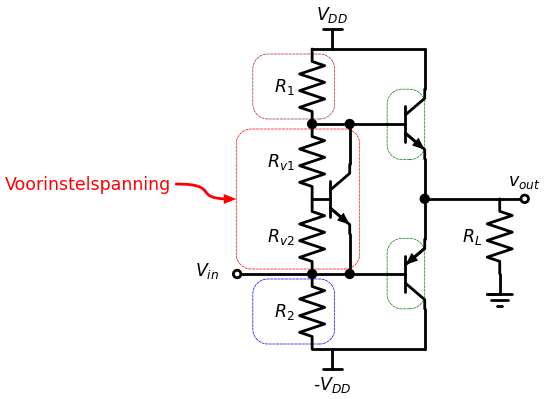

In [98]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=1.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=1.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    r1 = Resistor(xy=PullUpIn.start, d='up', label='$R_1$',l=1.5)
    Line(d='right', l=0.4)
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    r2=Resistor(xy=indot.start, d='down', label='$R_2$',l=1.5)
    Line(d='right', l=0.4)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    
    Line(xy=indot.start, d='left', l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])
    Line(d='down',xy=T1.emitter, l=0.8)
    outdot=Dot()
    Line(d='down',toy=T2.emitter)
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    
    EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    Voorinstelspanning = EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([r1],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([r2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('blue')
    
    Annotate(th1=0).at(Voorinstelspanning.W).delta(dx=-1.2, dy=0.3).label('Voorinstelspanning').color('red')

Hieronder tonen we de spice listing van de klasse B versterker waarbij we een voorinstelspanning voorzien tussen de  basissen van de npn en de pnp transistor. Deze voorinstelspanning is hier uitgevoerd door diodes. in {numref}`Bfig2dio` merken we hierbij op dat dit tot gevolg heeft dat er toch een stroom blijft lopen door de transistor die niet in geleiding is. Dit noemen we de klasse AB werking van deze klasseB versterker.

In [3]:
spicelisting("simul/classB2.sp")

Klasse B versterker
*
* SUPPLY VOLTAGES
VPOS 8 0 DC +15V
VNEG 9 0 DC -15V
*
VS2 10 0 DC 0 SIN(0V 5VPEAK 10KHZ)
*
D1  13 10   DNOM
RB1 13 8    10K
Q11 8 13 12 QNPN
*
D2  10 14   DNOM
RB2 14 9    10K
Q12 9 14 12 QPNP
*
RL2 12 0 100
*
* DEVICE MODELS
.model QNPN NPN(BF=50)
.model QPNP PNP(BF=50)
.model DNOM D()

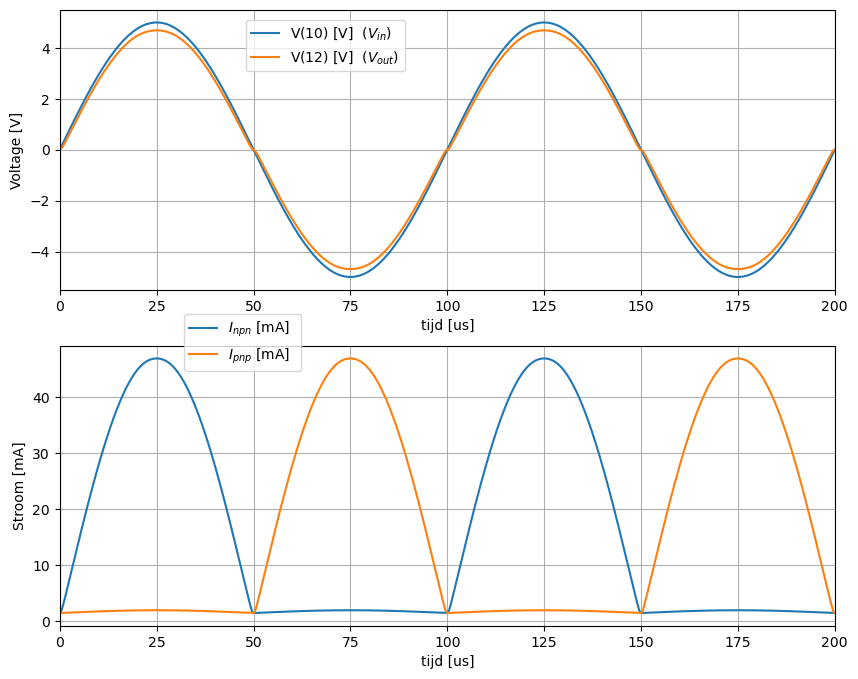

In [33]:
circuit=SpiceParser(path='simul/classB2.sp').build_circuit()  
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['10'],label='V(10) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['12'],label='V(12) [V]  ($V_{out}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

In de grafiek ({numref}`Bfig2dioss`) wordt dit nog duidelijker.

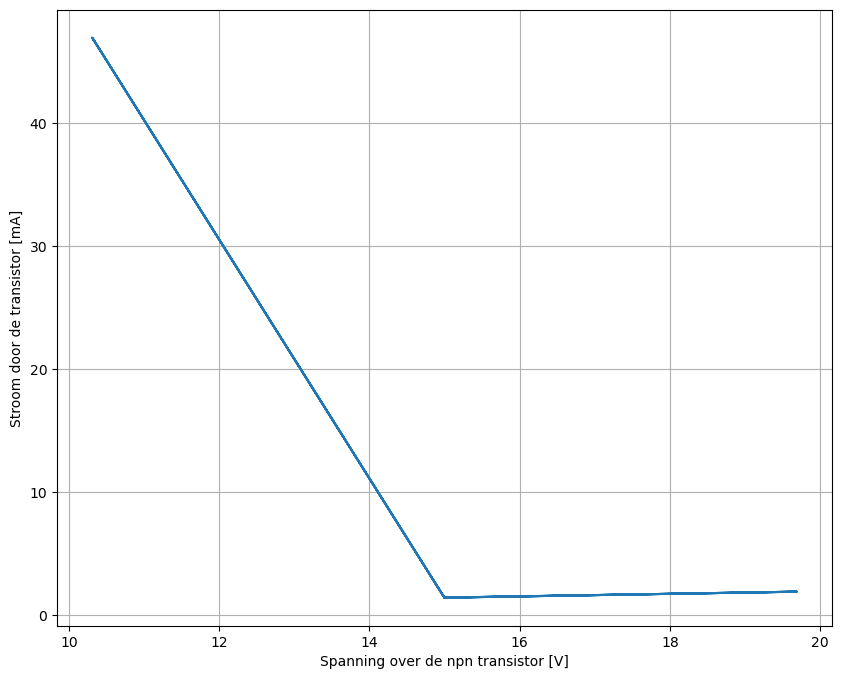

In [34]:
figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis.nodes['8']-analysis.nodes['12'],-analysis.branches['vpos']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de npn transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]')
plt.show()

We kunnen ook proberen de dode zone weg te werken aan de hand van feedback, zoals in het onderstaande schema aan de hand van een opamp. Op het eerste zicht lijkt dat te lukken, als we de simulatie in {numref}`Bopmapsim` bekijken. De $V_{in}$ en $V_{out}$ liggen zo goed als volledig op elkaar dat we het verschil niet merken. Enkel als we heel erg inzoemen, zoals in {numref}`Bopmapsimz` lijkt er een klein verschil te zijn langs de nuldoorgang. Laat je hierbij echter niet vangen. Deze simulatie is gedaan met een ideale OpAmp, waarvan de stijgsnelheid niet realistisch is. Wanneer we diezelfde simulatie hernemen met een realistische OpAmp, zie onder, blijft dit bijna ideale gedrag niet behouden.

In [5]:
spicelisting("simul/classB4.sp")

.title Klasse B versterker  PUSH-PULL PLACED IN OPAMP FEEDBACK LOOP
*
* SUPPLY VOLTAGES
VPOS 8 0 DC +15V
VNEG 9 0 DC -15V
*
VS3 20 0 DC 0 SIN(0V 5VPEAK 10KHZ)
*
Q21 8 23 22 QNPN
Q22 9 23 22 QPNP
RL3 22 0 100
*
XOpAmp 20 22 8 9 23 8 opamp
*
* DEVICE MODELS
.model QNPN NPN(BF=50)
.model QPNP PNP(BF=50)
.model DNOM D()

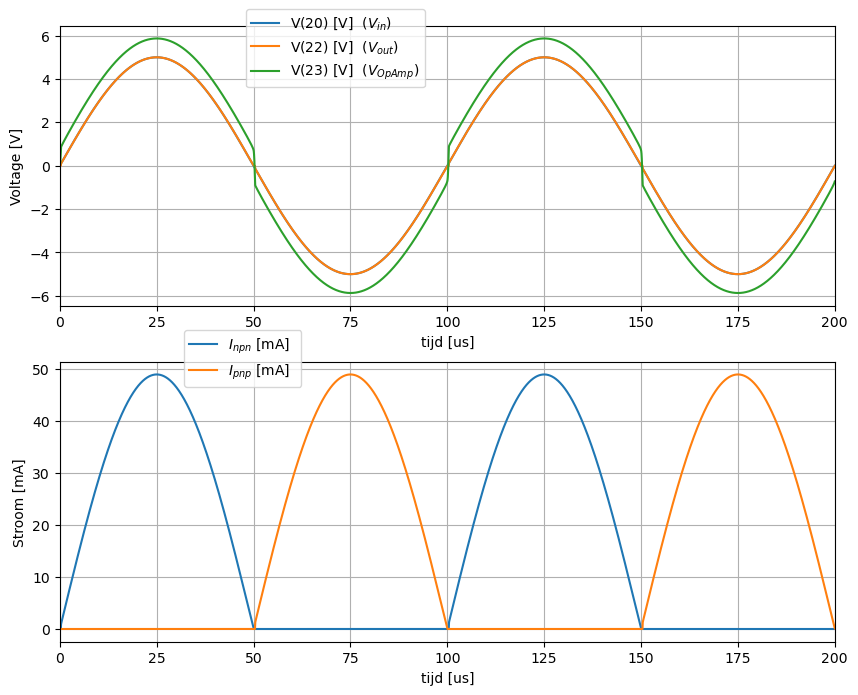

In [35]:
circuit=SpiceParser(path='simul/classB4.sp').build_circuit()  
circuit.include('libraries/opamp/BasicOpamp.cir')
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

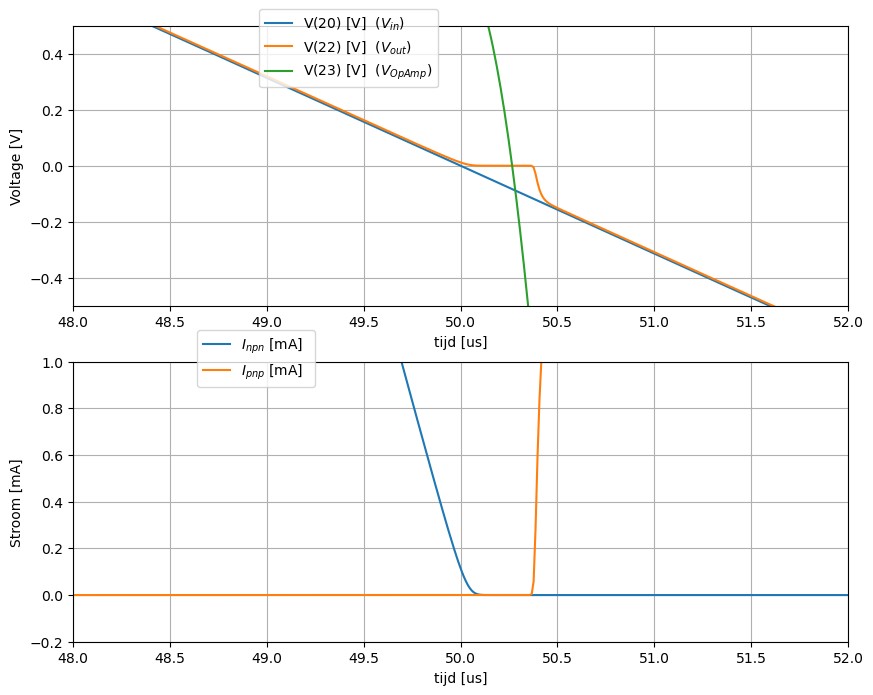

In [39]:
figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(48,52)
ax[0].set_ylim(-0.5,0.5)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(48,52)
ax[1].set_ylim(-0.2,1)
ax[1].set_ylabel('Stroom [mA]')
plt.show()


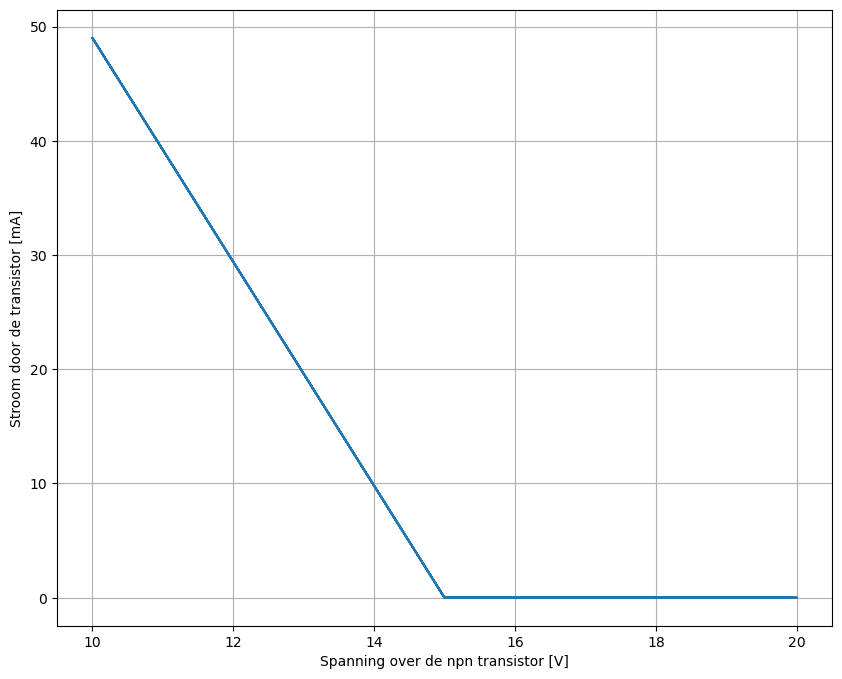

In [40]:
figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis.nodes['8']-analysis.nodes['22'],-analysis.branches['vpos']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de npn transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]')
plt.show()

In [6]:
spicelisting("simul/classB5.sp")

.title Klasse B versterker  PUSH-PULL PLACED IN OPAMP FEEDBACK LOOP
*
* SUPPLY VOLTAGES
VPOS 8 0 DC +2.5V
VNEG 9 0 DC -2.5V
*
VS3 20 0 DC 0 SIN(0V 1VPEAK 10KHZ)
*
Q21 8 23 22 QNPN
Q22 9 23 22 QPNP
RL3 22 0 100
*
XOpAmp 20 22 8 9 23 8 opamp
*
* DEVICE MODELS
.model QNPN NPN(BF=50)
.model QPNP PNP(BF=50)
.model DNOM D()

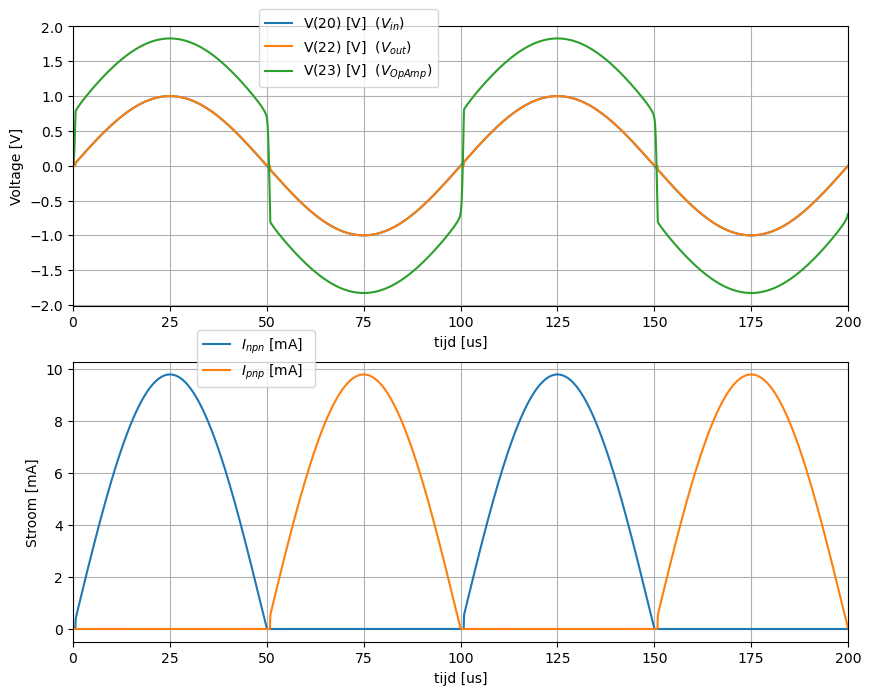

In [41]:
circuit=SpiceParser(path='simul/classB5.sp').build_circuit()  
circuit.include('libraries/opamp/BasicOpamp.cir')
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

Echter, wanneer we een realistisch model van een opamp invoeren, zoals de [LMV981-N](https://www.ti.com/product/LMV981-N) van Texas Instruments, zien we een heel ander gedrag in de dode zone.

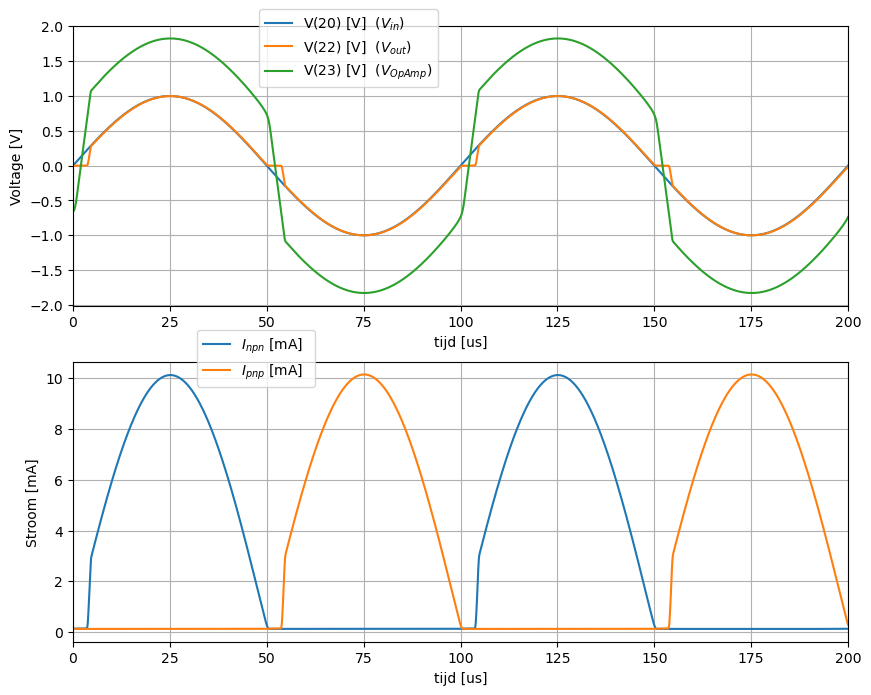

In [42]:
circuit=SpiceParser(path='simul/classB5.sp').build_circuit()  
circuit.include('libraries/opamp/LMV981.cir')   # Dit is een opamp met lage voedingsspanning. Beter een opamp kiezen met aangepast voedingsspaaningsbereik.
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

## Driver stage

Om de vermogentransistors van de klasse B versterker goed aan te sturen, zijn er, naast de voorinstelling tussen beide transistors, ook nog de elementen nodig die het pull-up gedeelte stroom vanuit de voeding $V_{DD}$ levert en die stroom vanuit het pull-down gedeelte afvoert naar -$V_{DD}$ of naar de grond. In de bovenstaande schema's wordt dat gedaan door respectievelijk $R_1$ en $R_2$. We kunnen de aansturing nog een stuk efficienter maken door de pull-down afvoer te implementeren met een transistor, zoals je kan zien in {numref}`Bfig1driver`.
We merken op dat de transistor in de driver stage werkt als een Klasse A versterker met het geheel van de klasse B versterker als belasting. Dat wil zeggen dat deze transistor ook de juiste instelling moet krijgen. Voor de verdere invulling van de transistor in de driver stage verwijzen we naar het hoofdstuk van de Klasse A versterker.
Een belangrijk voordeel is hier ook dat deze driver stage niet alleen de stroom versterkt maar ook de spanning. Dit wil zeggen dat we niet noodzakelijk een full swing ingangsignaal nodig hebben om een full swing output signaal te kunnen bekomen.

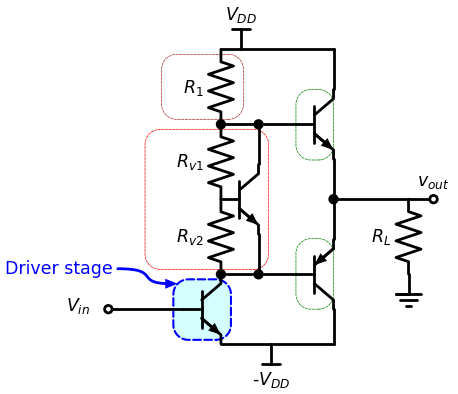

In [97]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=1.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=1.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    r1 = Resistor(xy=PullUpIn.start, d='up', label='$R_1$',l=1.5)
    Line(d='right', l=0.4)
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    Td=BjtNpn(d='right',xy=indot.start).anchor('collector')
    Line(d='right', xy= Td.emitter,l=1)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    
    Line(xy=Td.base, d='left', l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])
    Line(d='down',xy=T1.emitter, l=0.8)
    outdot=Dot()
    Line(d='down',toy=T2.emitter)
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    
    EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([r1],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('brown')
    driverbox=EncircleBox([Td],padx=0.2,pady=-0.1).linestyle('--').linewidth(1.5).color('blue').fill('xkcd:very light blue')
    
    Annotate(th1=0).at(driverbox.NW).delta(dx=-1.2, dy=0.3).label('Driver stage').color('blue')

## Stroombron

In {Numref}`Bfig1driver` zien we dat de werking van de weerstand $R_1$ eigenlijk het omgekeerde is als we zouden willen. Als de uitgang $V_{out}$ 0V is, staat er veel spanning over $R_1$ en levert $R_1$ dus veel stroom, terwijl er weinig stroom nodig is. Omgekeerd, wanneer de uitgang $V_{out}$ dicht bij $V_{DD}$ is staat er weinig spanning over $R_1$ en levert $R_1$ dus heel weinig stroom. Het is eigenlijk beter $R_1$ te vervangen door een constante stroombron. We zien een implementatie hiervan in {numref}`Bfigstroombron`.



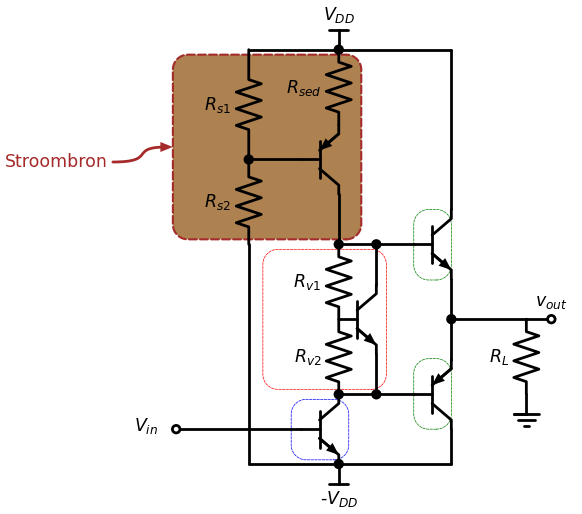

In [130]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=1.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=1.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    Line(d='up',xy=PullUpIn.start,l=1)
    Ts = BjtPnp(d='right').anchor('collector')
    rs = Resistor(d='up', label='$R_{sed}$',l=1.5)
    Dot()
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    Td=BjtNpn(d='right',xy=indot.start).anchor('collector')
    Dot(xy=Td.emitter)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    Line(xy=Td.base, d='left', l=2.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])
    Line(d='down',xy=T1.emitter, l=0.8)
    outdot=Dot()
    Line(d='down',toy=T2.emitter)
    Line(d='left',xy=rs.end, l=1.8)
    rs1 = Resistor(d='down', label='$R_{s1}$',toy=Ts.base)
    sbdot=Dot()
    rs2 = Resistor(d='down', label='$R_{s2}$',toy=PullUpIn.start)
    Line(d='down',toy=Td.emitter)
    Line(d='right',tox=Td.emitter)
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    Line(d='right',xy=sbdot.start,tox=Ts.base)
    EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    stroombron=EncircleBox([Ts,rs,rs1,rs2],padx=0.2,pady=-0.1).linestyle('--').linewidth(1.5).color('brown').fill('xkcd:light brown')
    EncircleBox([Td],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('blue')
    
    Annotate(th1=0).at(stroombron.W).delta(dx=-1.2, dy=-0.3).label('Stroombron').color('brown')

## Verhoging van het afgeleverde vermogen

De power transistors werken in principe als spanningsvolgers (met een offset) maar zijn in staat veel meer stroom te leveren aan de belasting ($R_L$) dan de driver trap. In principe kan elke power transistor de stroom met een factor $\beta_F$ vergroten.
In een aantal gevallen is deze stroomversterking nog niet voldoende. In deze sectie bespreken we de mogelijkheden om meer stroomversterking te bekomen.

### Het [Darlington](https://en.wikipedia.org/wiki/Darlington_transistor) paar

We kunnen dit oplossen door 2 power transistors achter elkaar te schakelen, zoals in {numref}`Darlington`.
De totale stroomversterking die we dan bekomen is dan het product van beide stroomversterkingen {cite}`Darlington`.

$$ \beta_+ = \beta_1 \beta_2 $$



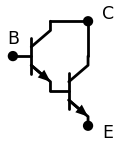

In [30]:
with schemdraw.Drawing():
    Dot().label("B")
    T1 = BjtNpn()
    T11 = BjtNpn(d='right',xy=T1.emitter)
    Dot(xy=T11.emitter).label("E", ofst=[0.4,-.4])
    Line( d='up',xy=T11.collector,toy=T1.collector)
    Dot().label("C", ofst=[0.4,-.1])
    Line(d='left',tox=T1.collector)

Het schema in {numref}`Darlington` heeft echter 2 problemen:

* thermal runaway

* lage stroomversterking $\beta_F$ bij heel lage stromen aan de basis



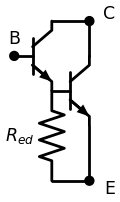

In [3]:
with schemdraw.Drawing():
    Dot().label("B")
    T1 = BjtNpn()
    T11 = BjtNpn(d='right',xy=T1.emitter)
    r11 = Resistor(d='down',xy=T1.emitter,l=1.8,label="$R_{ed}$")
    Line(d='down',xy=T11.emitter,toy=r11.end)
    Dot().label("E", ofst=[0.4,-.4])
    Line(d='left',tox=r11.end)
    Line( d='up',xy=T11.collector,toy=T1.collector)
    Dot().label("C", ofst=[0.4,-.1])
    Line(d='left',tox=T1.collector)

Het is natuurlijk belangrijk dat we zowel voor de NPN als voor de PNP de stroom vergroten aan de hand van een Darlingtonpaar. Het schema dat er bekomen wordt kan uitgewerkt worden voor elk van de bovenstaande Klasse B versterkerschemas. Wanneer we dit doen voor het schema in {numref}`Bfig1AC` bekomen we het schema in {numref}`Bdoubledriver`

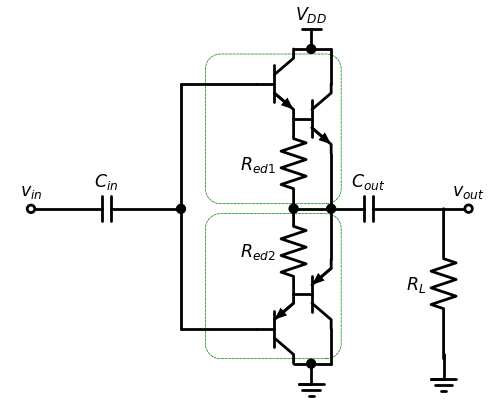

In [6]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='left', l=1.5)
    Line(d='down', l=2.5)
    indot=Dot()
    Line(d='down', l=2.4)
    Line(d='rigth', tox=T1.base)
    T2 = BjtPnp(d='right')
    C2 = Capacitor(d='left', xy=indot.start,label='$C_{in}$')
    Dot(open=True,label='$v_{in}$')
    T11 = BjtNpn(d='right',xy=T1.emitter)
    r11 = Resistor(d='down',xy=T1.emitter,l=1.8,label="$R_{ed1}$")
    outdot=Dot()
    Line(d='down',xy=T11.emitter,toy=outdot.start)
    Dot()
    Line( d='up',xy=T11.collector,toy=T1.collector)
    Line(d='left',l=0.4)
    Dot()
    Vdd(label='$V_{DD}$')
    Line(d='left',tox=T1.collector)
    
    r21 = Resistor(d='down',xy=outdot.start,toy=T2.emitter,label="$R_{ed2}$")
    T21 = BjtPnp( d='right')
    Line(d='up',xy=T21.emitter,toy=outdot.start)
    Line(d='down',xy=T21.collector,toy=T2.collector)
    Line(d='left',l=0.4)
    Dot()
    Ground()
    Line(d='left',tox=T2.collector)
    
    C1 = Capacitor(d='right',xy=outdot.start, label='$C_{out}$')
    R = Resistor( d='down', label='$R_L$')
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True,label='$v_{out}$')
    Ground(xy=R.end)
    Line(d='up',toy=T2.collector)
    EncircleBox([T1,T11,r11],pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2,T21,r21],pady=-0.1).linestyle('--').linewidth(0.5).color('green')

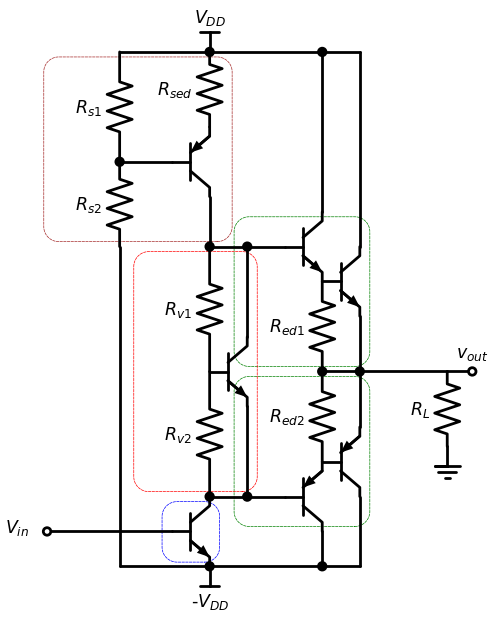

In [2]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=2.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=2.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    Line(d='up',xy=PullUpIn.start,l=1)
    Ts = BjtPnp(d='right').anchor('collector')
    rs = Resistor(d='up', label='$R_{sed}$',l=1.5)
    Dot()
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    Td=BjtNpn(d='right',xy=indot.start).anchor('collector')
    Dot(xy=Td.emitter)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    Line(xy=Td.base, d='left', l=2.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])

    T11 = BjtNpn(d='right',xy=T1.emitter)
    r11 = Resistor(d='down',xy=T1.emitter,l=1.8, label='$R_{ed1}$')
    outdot=Dot()
    Line(d='down',xy=T11.emitter,toy=outdot.start)
    Dot()
    Line( d='up',xy=T11.collector,toy=rs.end)
    Line(d='left',tox=T1.collector)
    Dot()
    r21 = Resistor(d='down',xy=outdot.start,toy=T2.emitter, label='$R_{ed2}$')
    T21 = BjtPnp( d='right')
    Line(d='up',xy=T21.emitter,toy=outdot.start)
    Line(d='down',xy=T21.collector,toy=Td.emitter)
    Line(d='left',tox=T2.collector)
    Dot()

    Line(d='left',xy=rs.end, l=1.8)
    rs1 = Resistor(d='down', label='$R_{s1}$',toy=Ts.base)
    sbdot=Dot()
    rs2 = Resistor(d='down', label='$R_{s2}$',toy=PullUpIn.start)
    Line(d='down',toy=Td.emitter)
    Line(d='right',tox=Td.emitter)
    Line(xy=outdot.start,  d='right', l=2.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    Line(d='right',xy=sbdot.start,tox=Ts.base)

    EncircleBox([T1,T11,r11],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2,T21,r21],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([Ts,rs,rs1,rs2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([Td],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('blue')

Wanneer we een Darlington paar toevoegen in het schema van {numref}`Bfigstroombron` krijgen we het schema in {numref}`Bfig3`

```{exercise} Toevoeging van Darlington transistorparen
:class: dropdown

Vervang de vermogentransistors in elk van de schema's van de voorinstelspanning door Darlington transistorparen
```

## Beveiliging van de Klasse B vermogentransistors

### Waar en hoe is beveiliging nodig?

### Beveiliging tegen overstroom 

{numref}`Bfig4` toont een eerste schema dat beveiliging tegen overstroom toevoegt. Het basisprincipe bij elke stroombeveliging is dat er gekeken wordt naar de stroom aan de uitgang van respectievelijk het pull-up en het pull-down netwerk (de groene blokken in {numref}`Bfig4`). Wanneer de stroom hier de hierboven aangegeven maximale stroom overschrijdt, grijpt het blok dat gekleurd is in Cyaan in. Dit gebeurt door de stroom aan de ingang van het groene blok rechtstreeks naar de uitgang te verbinden. 

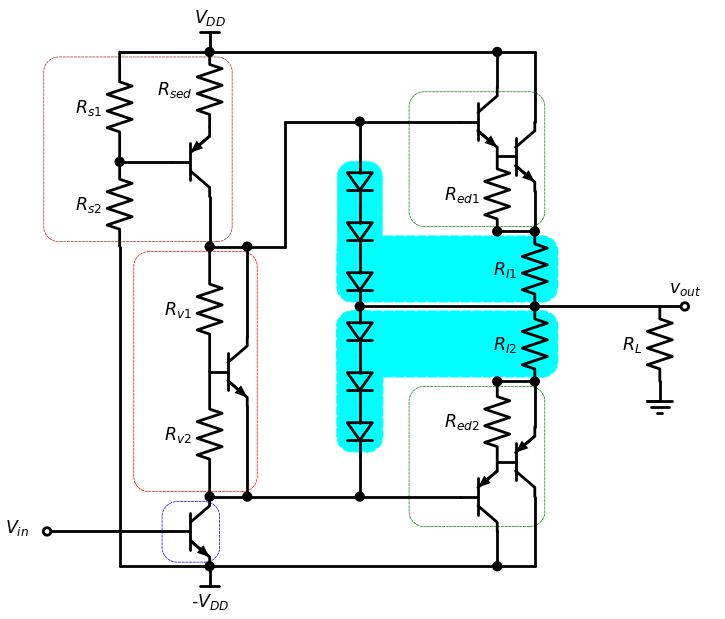

In [9]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=3.5)
    Line(d='down', l=2.5)
    Line(d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=2.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=2.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    Line(d='up',xy=PullUpIn.start,l=1)
    Ts = BjtPnp(d='right').anchor('collector')
    rs = Resistor(d='up', label='$R_{sed}$',l=1.5)
    Dot()
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    Td=BjtNpn(d='right',xy=indot.start).anchor('collector')
    Dot(xy=Td.emitter)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    Line(xy=Td.base, d='left', l=2.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])

    T11 = BjtNpn(d='right',xy=T1.emitter)
    r11 = Resistor(d='down',xy=T1.emitter,l=1.5, label='$R_{ed1}$')
    Dot()
    Line(d='right',tox=T11.emitter)
    pudot=Dot()
    Line(d='down',xy=T11.emitter,toy=r11.end)
    rI1 = Resistor(d='down',xy=pudot.start,l=1.5, label='$R_{I1}$')
    outdot=Dot()
    rI2 = Resistor(d='down',l=1.5, label='$R_{I2}$')
    pddot = Dot()
    
    Line( d='up',xy=T11.collector,toy=rs.end)
    Line(d='left',tox=T1.collector)
    Dot()

    Line(d='left',xy=pddot.start,tox=T2.emitter)
    Dot()
    r21 = Resistor(d='down',toy=T2.emitter, label='$R_{ed2}$')
    T21 = BjtPnp( d='right')
    Line(d='up',xy=T21.emitter,toy=pddot.start)
    Line(d='down',xy=T21.collector,toy=Td.emitter)
    Line(d='left',tox=T2.collector)
    Dot()

    Line(d='left',xy=rs.end, l=1.8)
    rs1 = Resistor(d='down', label='$R_{s1}$',toy=Ts.base)
    sbdot=Dot()
    rs2 = Resistor(d='down', label='$R_{s2}$',toy=PullUpIn.start)
    Line(d='down',toy=Td.emitter)
    Line(d='right',tox=Td.emitter)
    Line(xy=outdot.start,  d='right', l=2.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    Line(d='right',xy=sbdot.start,tox=Ts.base)

    Line(xy=outdot.start, d='left', l=3.5)
    Idot= Dot()
    d1a=Diode(d='up',l=1).reverse()
    d1b=Diode(d='up',l=1).reverse()
    d1c=Diode(d='up',l=1).reverse()
    Line(d='up',toy=T1.base)
    Dot()
    d2a=Diode(d='down',xy=Idot.start,l=1)
    d2b=Diode(d='down',l=1)
    d2c=Diode(d='down',l=1)
    Line(d='down',toy=Td.collector)
    Dot()
    EncircleBox([d1a,d1b,d1c],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').fill('cyan').zorder(0)
    EncircleBox([d1a,rI1],padx=0.2,pady=-0.1).linestyle('--').linewidth(1.5).color('cyan').fill('cyan').zorder(0)
    EncircleBox([d2a,d2b,d2c],padx=0.2,pady=-0.1).linestyle('--').linewidth(1.5).color('cyan').fill('cyan').zorder(0)
    EncircleBox([d2a,rI2],padx=0.2,pady=-0.1).linestyle('--').linewidth(1.5).color('cyan').fill('cyan').zorder(0)
    EncircleBox([T1,T11,r11],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2,T21,r21],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([Ts,rs,rs1,rs2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([Td],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('blue')

Een belangrijk nadeel van de schema's hierboven is dat ze slechts ingrijpen bij overstroom als de spanning over de weerstand $R_I$ ongeveer 0.7V bedraagt. Dit is normaal geen probleem als er gewerkt wordt met een hoge voedingsspanning $V_{DD}$, bv 80V. Indien er echter met een lage voedingsspanning gewerkt wordt, geeft het spanningsverlies over $R_I$ een belangrijk deel van het vermogenverlies. Een alternatieve oplossing om dat vermogenverlies te voorkomen is het plaatsen van een veel kleinere meetweerstand $R_I$ tussen de belasting en de grond en de gemeten spanning te versterken in de terugkoppeling of de aanstuur IC. 

De oplossing in {numref}`BfigILoad` is wel een minder robuuste oplossing, aangezien deze afhangt van de terugkoppeling en/of de IC, en dat het daardoor minder zeker is dat de beveiliging in alle omstandigheden zal ingrijpen.

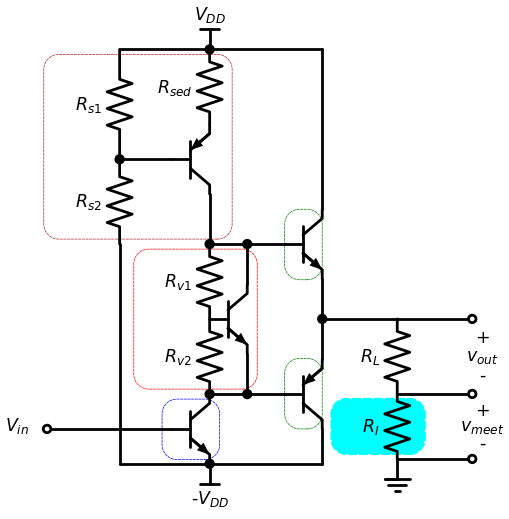

In [16]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=1.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=1.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    Line(d='up',xy=PullUpIn.start,l=1)
    Ts = BjtPnp(d='right').anchor('collector')
    rs = Resistor(d='up', label='$R_{sed}$',l=1.5)
    Dot()
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    Td=BjtNpn(d='right',xy=indot.start).anchor('collector')
    Dot(xy=Td.emitter)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    Line(xy=Td.base, d='left', l=2.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])
    Line(d='down',xy=T1.emitter, l=0.8)
    outdot=Dot()
    Line(d='down',toy=T2.emitter)
    Line(d='left',xy=rs.end, l=1.8)
    rs1 = Resistor(d='down', label='$R_{s1}$',toy=Ts.base)
    sbdot=Dot()
    rs2 = Resistor(d='down', label='$R_{s2}$',toy=PullUpIn.start)
    Line(d='down',toy=Td.emitter)
    Line(d='right',tox=Td.emitter)
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    RI= Resistor(d='down', label='$R_I$', l=1.3)
    Ground()
    Line(xy=R.start, d='right', l=1.5)
    Dot(open=True)
    Line(xy=R.end, d='right', l=1.5)
    Dot(open=True)
    Line(xy=RI.end, d='right', l=1.5)
    Dot(open=True)
    Gap(d='up', xy= R.end, toy= R.start, label=['-','$v_{out}$','$+$'],lblofst=-1.7)
    Gap(d='up', xy= RI.end, toy= RI.start, label=['-','$v_{meet}$','$+$'],lblofst=-1.7)
    Line(d='right',xy=sbdot.start,tox=Ts.base)
    
    EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([Ts,rs,rs1,rs2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([Td],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('blue')
    EncircleBox([RI],padx=0.3,pady=-0.1).linestyle('--').linewidth(1.5).color('cyan').fill('cyan')

## Filtering aan de ingang

In de meeste gevallen zijn er ook ongewenste signalen aan de ingang en het is niet efficient om deze ook mee te versterken.
Daarom is het efficient om deze signalen weg te filteren aan de ingang.
In {numref}`Bfig1AC` wordt dit reeds gedaan voor de DC component in het signaal. Deze is niet nuttig indien we enkel het AC signaal aan de uitgang bekomen. We kunnen echter een heel stuk beter doen. 

### Hoogdoorlaatfilter aan de ingang

{numref}`figBhoog` toont hoe we een hoogdoorlaatfilter aan de ingang van een klasse B versterker kunnen realiseren.

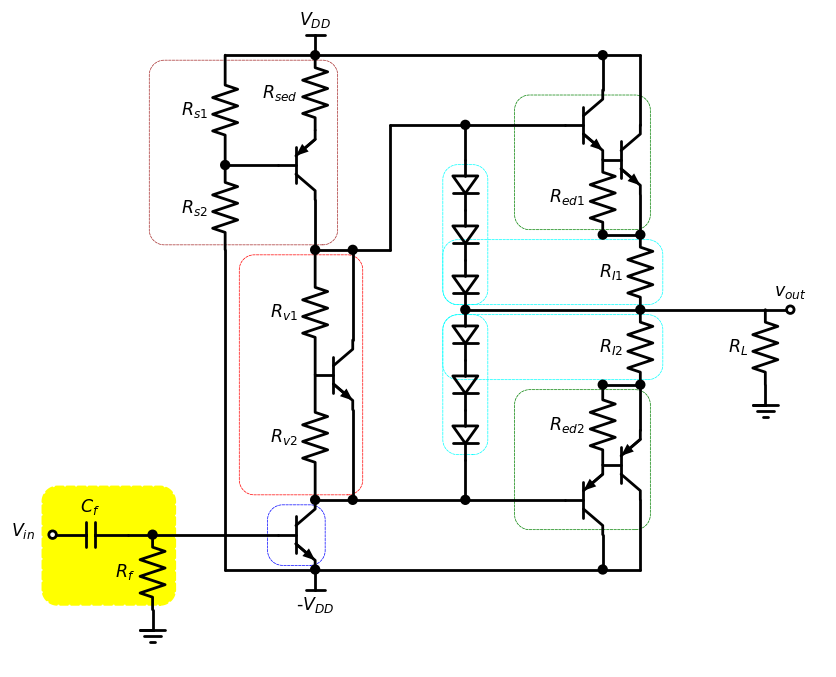

In [23]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=3.5)
    Line(d='down', l=2.5)
    Line(d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=2.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=2.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    Line(d='up',xy=PullUpIn.start,l=1)
    Ts = BjtPnp(d='right').anchor('collector')
    rs = Resistor(d='up', label='$R_{sed}$',l=1.5)
    Dot()
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    Td=BjtNpn(d='right',xy=indot.start).anchor('collector')
    Dot(xy=Td.emitter)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    Line(xy=Td.base, d='left', l=2.5)
    Dot()
    rf = Resistor(d='down', label='$R_{f}$',l=1.5)
    Ground()
    Line(xy=rf.start, d='left', l=0.5)
    cf = Capacitor(d='left', label='$C_{f}$',l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])

    T11 = BjtNpn(d='right',xy=T1.emitter)
    r11 = Resistor(d='down',xy=T1.emitter,l=1.5, label='$R_{ed1}$')
    Dot()
    Line(d='right',tox=T11.emitter)
    pudot=Dot()
    Line(d='down',xy=T11.emitter,toy=r11.end)
    rI1 = Resistor(d='down',xy=pudot.start,l=1.5, label='$R_{I1}$')
    outdot=Dot()
    rI2 = Resistor(d='down',l=1.5, label='$R_{I2}$')
    pddot = Dot()
    
    Line( d='up',xy=T11.collector,toy=rs.end)
    Line(d='left',tox=T1.collector)
    Dot()

    Line(d='left',xy=pddot.start,tox=T2.emitter)
    Dot()
    r21 = Resistor(d='down',toy=T2.emitter, label='$R_{ed2}$')
    T21 = BjtPnp( d='right')
    Line(d='up',xy=T21.emitter,toy=pddot.start)
    Line(d='down',xy=T21.collector,toy=Td.emitter)
    Line(d='left',tox=T2.collector)
    Dot()

    Line(d='left',xy=rs.end, l=1.8)
    rs1 = Resistor(d='down', label='$R_{s1}$',toy=Ts.base)
    sbdot=Dot()
    rs2 = Resistor(d='down', label='$R_{s2}$',toy=PullUpIn.start)
    Line(d='down',toy=Td.emitter)
    Line(d='right',tox=Td.emitter)
    Line(xy=outdot.start,  d='right', l=2.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    Line(d='right',xy=sbdot.start,tox=Ts.base)

    Line(xy=outdot.start, d='left', l=3.5)
    Idot= Dot()
    d1a=Diode(d='up',l=1).reverse()
    d1b=Diode(d='up',l=1).reverse()
    d1c=Diode(d='up',l=1).reverse()
    Line(d='up',toy=T1.base)
    Dot()
    d2a=Diode(d='down',xy=Idot.start,l=1)
    d2b=Diode(d='down',l=1)
    d2c=Diode(d='down',l=1)
    Line(d='down',toy=Td.collector)
    Dot()
    EncircleBox([d1a,d1b,d1c],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(0)
    EncircleBox([d1a,rI1],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(0)
    EncircleBox([d2a,d2b,d2c],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(0)
    EncircleBox([d2a,rI2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(0)
    EncircleBox([T1,T11,r11],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2,T21,r21],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([Ts,rs,rs1,rs2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([Td],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('blue')
    EncircleBox([rf,cf],padx=0.2,pady=-0.1).linestyle('--').linewidth(1.5).color('yellow').fill('yellow')

### Laagdoorlaatfilter aan de ingang

{numref}`figBlaag` toont hoe we een laagdoorlaatfilter aan de ingang van een klasse B versterker kunnen realiseren.

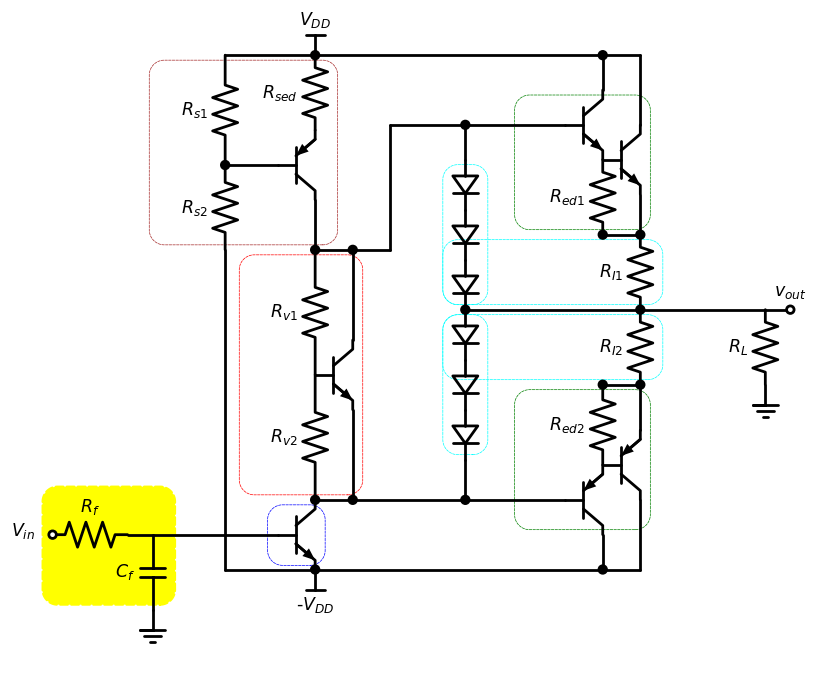

In [25]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=3.5)
    Line(d='down', l=2.5)
    Line(d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=2.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=2.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    Line(d='up',xy=PullUpIn.start,l=1)
    Ts = BjtPnp(d='right').anchor('collector')
    rs = Resistor(d='up', label='$R_{sed}$',l=1.5)
    Dot()
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    Td=BjtNpn(d='right',xy=indot.start).anchor('collector')
    Dot(xy=Td.emitter)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    Line(xy=Td.base, d='left', l=2.5)
    cf = Capacitor(d='down', label='$C_{f}$',l=1.5)
    Ground()
    Line(xy=cf.start, d='left', l=0.5)
    rf = Resistor(d='left',  label='$R_{f}$',l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])

    T11 = BjtNpn(d='right',xy=T1.emitter)
    r11 = Resistor(d='down',xy=T1.emitter,l=1.5, label='$R_{ed1}$')
    Dot()
    Line(d='right',tox=T11.emitter)
    pudot=Dot()
    Line(d='down',xy=T11.emitter,toy=r11.end)
    rI1 = Resistor(d='down',xy=pudot.start,l=1.5, label='$R_{I1}$')
    outdot=Dot()
    rI2 = Resistor(d='down',l=1.5, label='$R_{I2}$')
    pddot = Dot()
    
    Line( d='up',xy=T11.collector,toy=rs.end)
    Line(d='left',tox=T1.collector)
    Dot()

    Line(d='left',xy=pddot.start,tox=T2.emitter)
    Dot()
    r21 = Resistor(d='down',toy=T2.emitter, label='$R_{ed2}$')
    T21 = BjtPnp( d='right')
    Line(d='up',xy=T21.emitter,toy=pddot.start)
    Line(d='down',xy=T21.collector,toy=Td.emitter)
    Line(d='left',tox=T2.collector)
    Dot()

    Line(d='left',xy=rs.end, l=1.8)
    rs1 = Resistor(d='down', label='$R_{s1}$',toy=Ts.base)
    sbdot=Dot()
    rs2 = Resistor(d='down', label='$R_{s2}$',toy=PullUpIn.start)
    Line(d='down',toy=Td.emitter)
    Line(d='right',tox=Td.emitter)
    Line(xy=outdot.start,  d='right', l=2.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    Line(d='right',xy=sbdot.start,tox=Ts.base)

    Line(xy=outdot.start, d='left', l=3.5)
    Idot= Dot()
    d1a=Diode(d='up',l=1).reverse()
    d1b=Diode(d='up',l=1).reverse()
    d1c=Diode(d='up',l=1).reverse()
    Line(d='up',toy=T1.base)
    Dot()
    d2a=Diode(d='down',xy=Idot.start,l=1)
    d2b=Diode(d='down',l=1)
    d2c=Diode(d='down',l=1)
    Line(d='down',toy=Td.collector)
    Dot()
    EncircleBox([d1a,d1b,d1c],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(1)
    EncircleBox([d1a,rI1],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(0)
    EncircleBox([d2a,d2b,d2c],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(1)
    EncircleBox([d2a,rI2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(0)
    EncircleBox([T1,T11,r11],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2,T21,r21],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([Ts,rs,rs1,rs2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([Td],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('blue')
    EncircleBox([rf,cf],padx=0.2,pady=-0.1).linestyle('--').linewidth(1.5).color('yellow').fill('yellow')

### Banddoorlaatfilter aan de ingang

De hoogdoorlaatfilter in {numref}`figBhoog` en de laagdoorlaatfilter in {numref}`figBlaag` kunnen gecombineerd worden in een banddoorlaatfilter zoals getoond wordt in {numref}`figBband`. Dit is de meest eenvoudige oplossing om een banddoorlaatfilter te bekomen overeenstemmende met de gewenste karakteristieken van het signaal. Er zijn heel wat mogelijkheden om nog veel betere ingangsfilters te ontwerpen. Dit is echter niet het doel van deze cursus. Hiervoor verwijzen we naar de cursus [toegepaste analoge Elektronica](https://jangenoe.github.io/InteractieveCursus/ToegepasteAnalogeElektronica/intro.html) {cite}`jangenoeCursusToegepasteAnaloge2024`

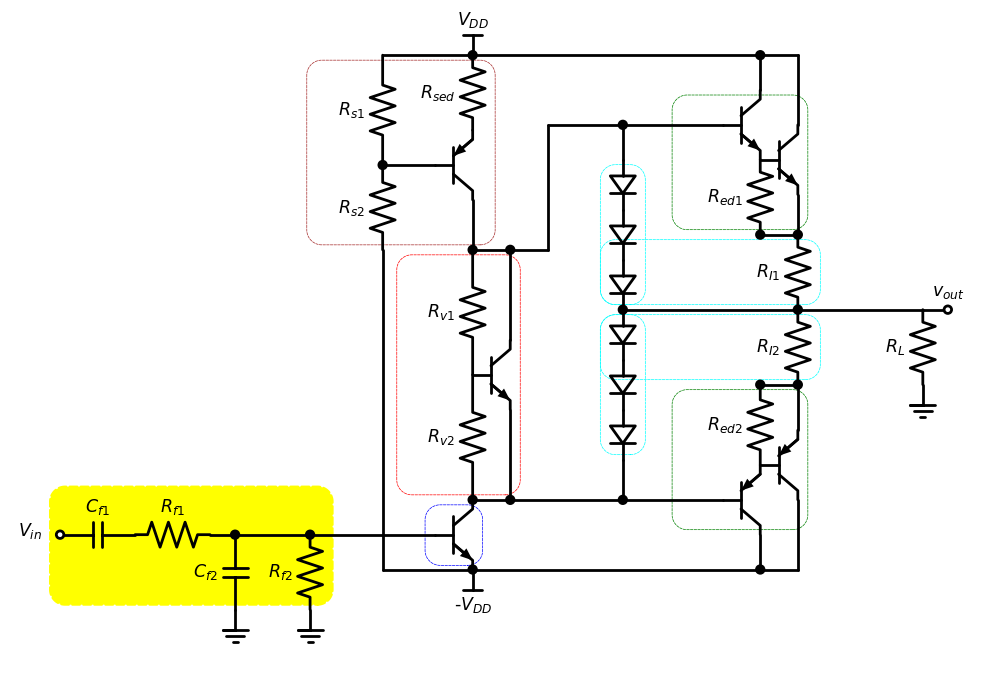

In [19]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=3.5)
    Line(d='down', l=2.5)
    Line(d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=2.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=2.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    Line(d='up',xy=PullUpIn.start,l=1)
    Ts = BjtPnp(d='right').anchor('collector')
    rs = Resistor(d='up', label='$R_{sed}$',l=1.5)
    Dot()
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    Td=BjtNpn(d='right',xy=indot.start).anchor('collector')
    Dot(xy=Td.emitter)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    Line(xy=Td.base, d='left', l=2.5)
    Dot()
    rf2 = Resistor(d='down', label='$R_{f2}$',l=1.5)
    Ground()
    Line(xy=rf2.start, d='left', l=1.5)
    Dot()
    cf2 = Capacitor(d='down', label='$C_{f2}$',l=1.5)
    Ground()
    Line(xy=cf2.start, d='left', l=0.5)
    rf1 = Resistor(d='left',  label='$R_{f1}$',l=1.5)
    cf1 = Capacitor(d='left', label='$C_{f1}$',l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])
    
    
    T11 = BjtNpn(d='right',xy=T1.emitter)
    r11 = Resistor(d='down',xy=T1.emitter,l=1.5, label='$R_{ed1}$')
    Dot()
    Line(d='right',tox=T11.emitter)
    pudot=Dot()
    Line(d='down',xy=T11.emitter,toy=r11.end)
    rI1 = Resistor(d='down',xy=pudot.start,l=1.5, label='$R_{I1}$')
    outdot=Dot()
    rI2 = Resistor(d='down',l=1.5, label='$R_{I2}$')
    pddot = Dot()
    
    Line( d='up',xy=T11.collector,toy=rs.end)
    Line(d='left',tox=T1.collector)
    Dot()

    Line(d='left',xy=pddot.start,tox=T2.emitter)
    Dot()
    r21 = Resistor(d='down',toy=T2.emitter, label='$R_{ed2}$')
    T21 = BjtPnp( d='right')
    Line(d='up',xy=T21.emitter,toy=pddot.start)
    Line(d='down',xy=T21.collector,toy=Td.emitter)
    Line(d='left',tox=T2.collector)
    Dot()

    Line(d='left',xy=rs.end, l=1.8)
    rs1 = Resistor(d='down', label='$R_{s1}$',toy=Ts.base)
    sbdot=Dot()
    rs2 = Resistor(d='down', label='$R_{s2}$',toy=PullUpIn.start)
    Line(d='down',toy=Td.emitter)
    Line(d='right',tox=Td.emitter)
    Line(xy=outdot.start,  d='right', l=2.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    Line(d='right',xy=sbdot.start,tox=Ts.base)

    Line(xy=outdot.start, d='left', l=3.5)
    Idot= Dot()
    d1a=Diode(d='up',l=1).reverse()
    d1b=Diode(d='up',l=1).reverse()
    d1c=Diode(d='up',l=1).reverse()
    Line(d='up',toy=T1.base)
    Dot()
    d2a=Diode(d='down',xy=Idot.start,l=1)
    d2b=Diode(d='down',l=1)
    d2c=Diode(d='down',l=1)
    Line(d='down',toy=Td.collector)
    Dot()
    EncircleBox([d1a,d1b,d1c],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(1)
    EncircleBox([d1a,rI1],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(0)
    EncircleBox([d2a,d2b,d2c],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(1)
    EncircleBox([d2a,rI2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('cyan').zorder(0)
    EncircleBox([T1,T11,r11],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2,T21,r21],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([Ts,rs,rs1,rs2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([Td],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('blue')
    EncircleBox([rf1,rf2,cf1,cf2],padx=0.2,pady=-0.1).linestyle('--').linewidth(1.5).color('yellow').fill('yellow')

{numref}`BPfilter` toont de bandpass filter op zich, in de veronderstelling dat de stroom door $R_{f2}$ veel groter is dan de ingangsstroom aan de basis van de driver transistor. In dat geval mogen we deze basisstroom verwaarlozen en kunnen we stellen dat de uitgangsspanning van het filter bekomen wordt door de spanningsdeling van de 2 impedanties $Z_1$ en $Z_2$ als:

$$ \frac{V_{filter}}{V_{in}} = \frac{Z_2}{Z_1+ Z_2}  = \frac{1}{\frac{Z_1}{Z_2}+ 1} $$

met

$$ Z_1 = \frac{1}{j \omega C_{f1}} + R_{f1} $$

en 

$$ \frac{1}{Z_2} = j \omega C_{f2} + \frac{1}{R_{f2}} $$

Hieruit volgt:

$$ \frac{V_{filter}}{V_{in}} =  \frac{1}{(\frac{1}{j \omega C_{f1}} + R_{f1})(j \omega C_{f2} + \frac{1}{R_{f2}})+ 1} $$


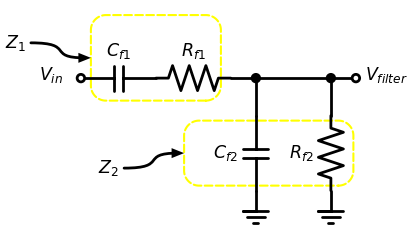

In [9]:
with schemdraw.Drawing():
    Dot(open=True).label('$V_{filter}$', ofst=[0.6,-.2])
    Line(d='left', l=0.5)
    rfdot1=Dot()
    Line(d='down', l=0.75)
    rf2 = Resistor(d='down', label='$R_{f2}$',l=1.5)
    Ground()
    Line(xy=rfdot1.start, d='left', l=1.5)
    rfdot2=Dot()
    Line(d='down', l=0.75)
    cf2 = Capacitor(d='down', label='$C_{f2}$',l=1.5)
    Ground()
    Line(xy=rfdot2.start, d='left', l=0.5)
    rf1 = Resistor(d='left',  label='$R_{f1}$',l=1.5)
    cf1 = Capacitor(d='left', label='$C_{f1}$',l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])
    
    Z1=EncircleBox([rf1,cf1],padx=-0.2,pady=0.2).linestyle('--').linewidth(1.5).color('yellow')
    Z2=EncircleBox([rf2,cf2],padx=0.2,pady=-0.1).linestyle('--').linewidth(1.5).color('yellow')
    Annotate(th1=0).at(Z1.W).delta(dx=-1.2, dy=0.3).label('$Z_1$')
    Annotate(th1=0).at(Z2.W).delta(dx=-1.2, dy=-0.3).label('$Z_2$')

```{exercise} Berekening laagdoorlaat en hoogdoorlaatkarakteristiek
:class: dropdown

Hierboven hebben we de banddoorlaatfilter uitgerekend die overeenkomt met {numref}`figBband`.
Reken ook de filterkarekteristieken uit van de hoogdoorlaatfilter in 
{numref}`figBhoog` en de laagdoorlaatfilter in {numref}`figBlaag`. 
```

## Zelftest via Flashcards

$\,\!$

Klik op de vraag als je je antwoord wil nakijken. Klik op next om de volgende vraag te bekomen.

In [2]:
# zolang nbconvert een foute scaling neemt, zetten we dit op remove_cell4reveal in de slides.
# waarom verdwijnt dit na heropenen als not trusted
from jupytercards import display_flashcards
a=[{"front": "Waarom verkiezen we bij een Darlington Paar emiterdegeneratie toe te passen?",
    "back":  "(1) Voorkomen dat temperatuursveranderingen een groot verschil in stroomversterking geven (2) Bij heel lage stromen wordt de $\beta$ kleiner dan 1. Het is beter in dit geval maar met 1 stroomversterkingstrap te werken."},
   {"front": "Waarom kan de terugkoppeling een luie zone overwinnen maar geen dode zone?",
    "back":  "In de luie zone is de versterking van de klasse B trap kleiner dan 1, maar niet 0. Bij een gesloten lusversterking kan de OpAmp deze lagere versterking compenseren door een hogere versterking tussen in- en uitgang, zodat het product van beide versterkingen 1 wordt. Wanneer de versterking 0 wordt (dode zone) kan het product nooit 1 zijn."}]
display_flashcards(a)

<IPython.core.display.Javascript object>